# Item-level processing and visualization (metadata)

This notebook builds an item-level table using `parent_asin` from the Industrial_and_Scientific metadata dataset and focuses on visualization.


In [2]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_from_disk

sns.set_theme(style='whitegrid')

data_dir = Path('data')
dataset_dir = data_dir / 'raw_meta_Industrial_and_Scientific_hf'
if not dataset_dir.exists():
    raise FileNotFoundError(f'Missing dataset directory: {dataset_dir}')


/opt/anaconda3/envs/deeplearning/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load from disk
dataset = load_from_disk(dataset_dir)
dataset


Dataset({
    features: ['main_category', 'title', 'average_rating', 'rating_number', 'features', 'description', 'price', 'images', 'videos', 'store', 'categories', 'details', 'parent_asin', 'bought_together', 'subtitle', 'author'],
    num_rows: 427564
})

In [4]:
# Convert to pandas
df = dataset.to_pandas()
df.head()


,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,Industrial & Scientific,Carlisle FoodService Products 1077108 StorPlus...,4.4,206,[Tight double-sealing lids protect against spi...,[Round Lid fits 2-4qt StorPlus round storage c...,14.27,{'hi_res': ['https://m.media-amazon.com/images...,{'title': ['want your PANTRY to be TRENDY & CL...,Carlisle FoodService Products,"[Industrial & Scientific, Food Service Equipme...","{""Material"": ""Polypropylene"", ""Color"": ""green""...",B07N83D8HC,None,None,None
1,Office Products,OSHA Notice Signs - Do Not Open Door Must Be O...,5.0,1,[EXTREMELY DURABLE: All our OSHA safety produc...,[Make Sure You & Your Business are OSHA & ANSI...,6.99,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",SignMission,"[Industrial & Scientific, Occupational Health ...","{""Manufacturer"": ""SignMission"", ""Brand"": ""Sign...",B07T3RJCL7,None,None,None
2,Tools & Home Improvement,TEKTON 7165 6-Inch Dial Caliper,3.6,125,"[Reads 0-6 inches in 0.001 inch graduations, M...",[Measuring to 0.001 inch (no metric increments...,None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",TEKTON,"[Industrial & Scientific, Test, Measure & Insp...","{""Manufacturer"": ""TEKTON"", ""Part Number"": ""716...",B000NQ4PVG,None,None,None
3,All Electronics,Conwork Heat Shrink Fork Terminal Connectors K...,4.3,10,[MULTI SIZES EASY IDENTIFICATION- Total 108 pc...,[Conforms to Marine automotive etc manufacture...,None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",Conwork,"[Industrial & Scientific, Industrial Electrica...","{""Connector Type"": ""Crimp"", ""Contact Material""...",B06XF9L8TT,None,None,None
4,Industrial & Scientific,HiLetgo 20pcs WH148 Single-Joint Potentiometer...,4.6,422,"[Model: WH148 B1K Ohm, Single potentiometer, l...",[20pcs WH148 Single-Joint Potentiometer 1K B1K...,9.29,{'hi_res': ['https://m.media-amazon.com/images...,{'title': ['TWTADE 64PCS Potentiometer Kit(WH1...,HiLetgo,"[Industrial & Scientific, Industrial Electrica...","{""Package Dimensions"": ""4.69 x 3.19 x 1.34 inc...",B07VJ4DNLW,None,None,None


In [5]:
# Use parent_asin as item identifier (metadata does not include asin)
if 'parent_asin' not in df.columns:
    raise KeyError('parent_asin column not found in metadata dataset')

item_df = df.drop_duplicates(subset=['parent_asin']).reset_index(drop=True)
item_df.head()


,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,Industrial & Scientific,Carlisle FoodService Products 1077108 StorPlus...,4.4,206,[Tight double-sealing lids protect against spi...,[Round Lid fits 2-4qt StorPlus round storage c...,14.27,{'hi_res': ['https://m.media-amazon.com/images...,{'title': ['want your PANTRY to be TRENDY & CL...,Carlisle FoodService Products,"[Industrial & Scientific, Food Service Equipme...","{""Material"": ""Polypropylene"", ""Color"": ""green""...",B07N83D8HC,None,None,None
1,Office Products,OSHA Notice Signs - Do Not Open Door Must Be O...,5.0,1,[EXTREMELY DURABLE: All our OSHA safety produc...,[Make Sure You & Your Business are OSHA & ANSI...,6.99,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",SignMission,"[Industrial & Scientific, Occupational Health ...","{""Manufacturer"": ""SignMission"", ""Brand"": ""Sign...",B07T3RJCL7,None,None,None
2,Tools & Home Improvement,TEKTON 7165 6-Inch Dial Caliper,3.6,125,"[Reads 0-6 inches in 0.001 inch graduations, M...",[Measuring to 0.001 inch (no metric increments...,None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",TEKTON,"[Industrial & Scientific, Test, Measure & Insp...","{""Manufacturer"": ""TEKTON"", ""Part Number"": ""716...",B000NQ4PVG,None,None,None
3,All Electronics,Conwork Heat Shrink Fork Terminal Connectors K...,4.3,10,[MULTI SIZES EASY IDENTIFICATION- Total 108 pc...,[Conforms to Marine automotive etc manufacture...,None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",Conwork,"[Industrial & Scientific, Industrial Electrica...","{""Connector Type"": ""Crimp"", ""Contact Material""...",B06XF9L8TT,None,None,None
4,Industrial & Scientific,HiLetgo 20pcs WH148 Single-Joint Potentiometer...,4.6,422,"[Model: WH148 B1K Ohm, Single potentiometer, l...",[20pcs WH148 Single-Joint Potentiometer 1K B1K...,9.29,{'hi_res': ['https://m.media-amazon.com/images...,{'title': ['TWTADE 64PCS Potentiometer Kit(WH1...,HiLetgo,"[Industrial & Scientific, Industrial Electrica...","{""Package Dimensions"": ""4.69 x 3.19 x 1.34 inc...",B07VJ4DNLW,None,None,None


In [6]:
# Save item-level table
out_path = data_dir / 'industrial_and_scientific_items.csv'
item_df.to_csv(out_path, index=False)
out_path


PosixPath('data/industrial_and_scientific_items.csv')

In [7]:
# Basic stats
num_items = len(item_df)
num_missing_title = int(item_df['title'].isna().sum()) if 'title' in item_df.columns else None
num_missing_price = int(item_df['price'].isna().sum()) if 'price' in item_df.columns else None
num_items, num_missing_title, num_missing_price


(427564, 0, 0)

In [8]:
# Visualization output directory
fig_dir = data_dir / 'figures'
fig_dir.mkdir(parents=True, exist_ok=True)
fig_dir


PosixPath('data/figures')

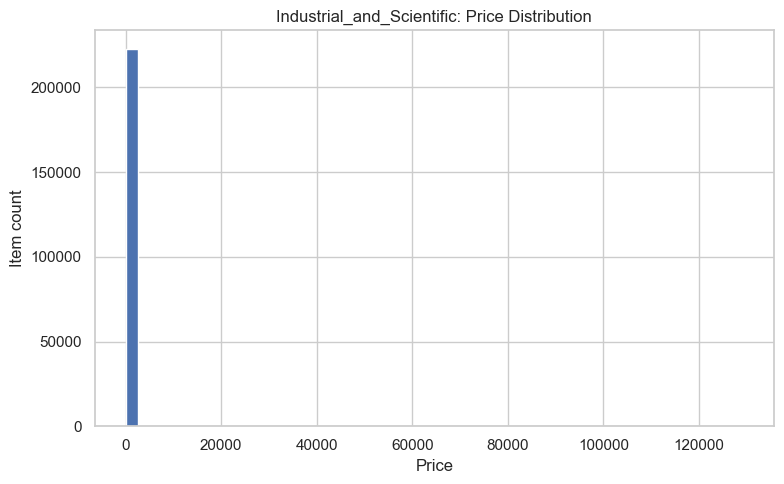

In [9]:
# Price distribution (if price exists)
if 'price' in item_df.columns:
    price_series = pd.to_numeric(item_df['price'], errors='coerce').dropna()
    if len(price_series) > 0:
        plt.figure(figsize=(8, 5))
        plt.hist(price_series, bins=50)
        plt.title('Industrial_and_Scientific: Price Distribution')
        plt.xlabel('Price')
        plt.ylabel('Item count')
        price_hist_path = fig_dir / 'price_hist.png'
        plt.tight_layout()
        plt.savefig(price_hist_path, dpi=150)
        price_hist_path
    else:
        'price column exists but no numeric values'
else:
    'price column not found'


该图用于查看商品价格的整体分布情况，帮助判断价格主要集中在哪些区间，为后续定价分析或区间划分提供参考。


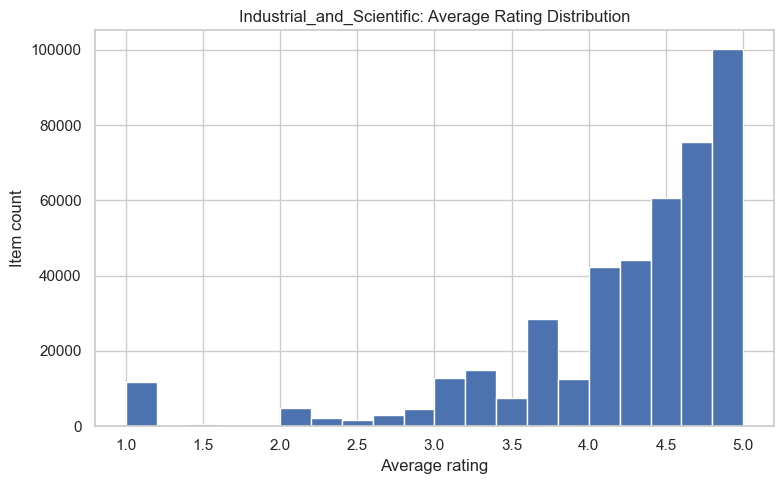

In [10]:
# Rating distribution (if average_rating exists)
if 'average_rating' in item_df.columns:
    rating_series = pd.to_numeric(item_df['average_rating'], errors='coerce').dropna()
    if len(rating_series) > 0:
        plt.figure(figsize=(8, 5))
        plt.hist(rating_series, bins=20)
        plt.title('Industrial_and_Scientific: Average Rating Distribution')
        plt.xlabel('Average rating')
        plt.ylabel('Item count')
        rating_hist_path = fig_dir / 'average_rating_hist.png'
        plt.tight_layout()
        plt.savefig(rating_hist_path, dpi=150)
        rating_hist_path
    else:
        'average_rating column exists but no numeric values'
else:
    'average_rating column not found'


该图用于查看商品平均评分的整体分布情况，帮助评估商品口碑分布，并为后续筛选或分层分析提供依据。


In [11]:
# Top 20 brands by item count (if brand exists)
if 'brand' in item_df.columns:
    top_n = 20
    top_brands = item_df['brand'].fillna('Unknown').value_counts().head(top_n)
    plt.figure(figsize=(10, 6))
    plt.barh(top_brands.index[::-1], top_brands.values[::-1])
    plt.title(f'Top {top_n} Brands by Item Count')
    plt.xlabel('Item count')
    plt.ylabel('Brand')
    brand_path = fig_dir / 'top_20_brands.png'
    plt.tight_layout()
    plt.savefig(brand_path, dpi=150)
    brand_path
else:
    'brand column not found'


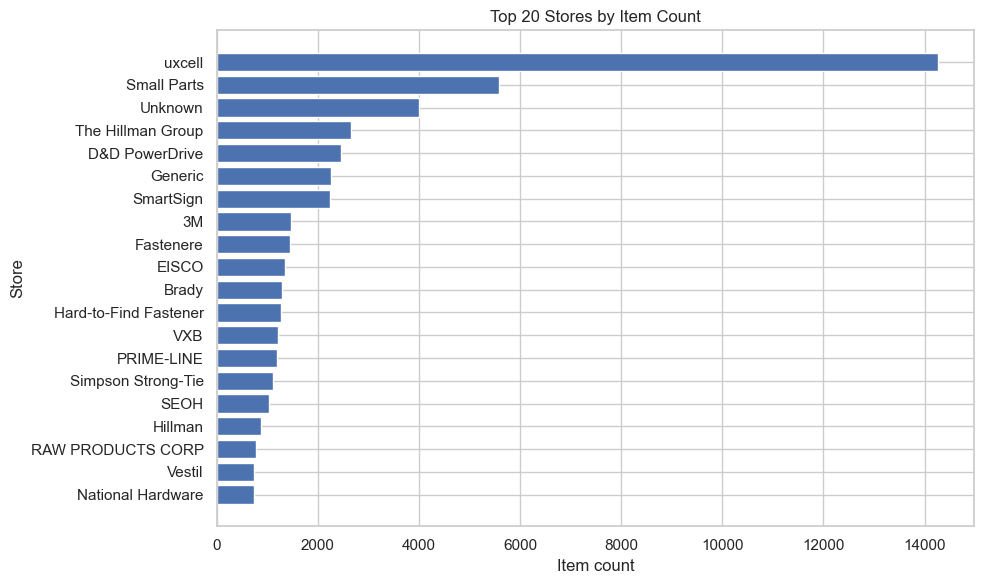

In [12]:
# Top 20 stores by item count (if store exists)
if 'store' in item_df.columns:
    top_n = 20
    top_stores = item_df['store'].fillna('Unknown').value_counts().head(top_n)
    plt.figure(figsize=(10, 6))
    plt.barh(top_stores.index[::-1], top_stores.values[::-1])
    plt.title(f'Top {top_n} Stores by Item Count')
    plt.xlabel('Item count')
    plt.ylabel('Store')
    store_path = fig_dir / 'top_20_stores.png'
    plt.tight_layout()
    plt.savefig(store_path, dpi=150)
    store_path
else:
    'store column not found'


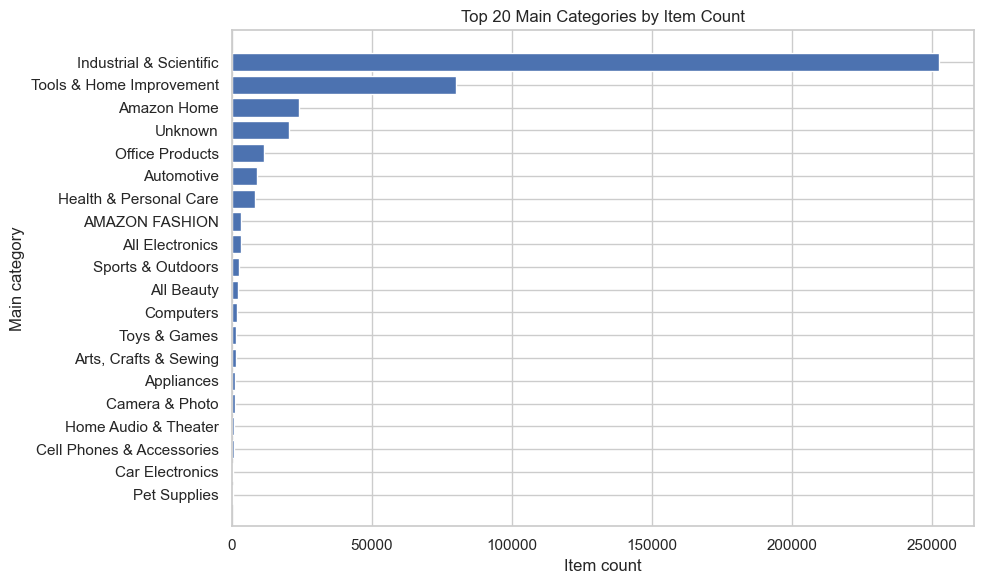

In [13]:
# Main category distribution (if main_category exists)
if 'main_category' in item_df.columns:
    top_n = 20
    cat_counts = item_df['main_category'].fillna('Unknown').value_counts()
    top_cats = cat_counts.head(top_n)
    plt.figure(figsize=(10, 6))
    plt.barh(top_cats.index[::-1], top_cats.values[::-1])
    plt.title(f'Top {top_n} Main Categories by Item Count')
    plt.xlabel('Item count')
    plt.ylabel('Main category')
    cat_count_path = fig_dir / 'top_20_main_categories.png'
    plt.tight_layout()
    plt.savefig(cat_count_path, dpi=150)
    cat_count_path
else:
    'main_category column not found'


该图用于查看商品数量最多的主分类，帮助了解商品供给主要集中在哪些大类，从而支持品类结构分析与资源分配。


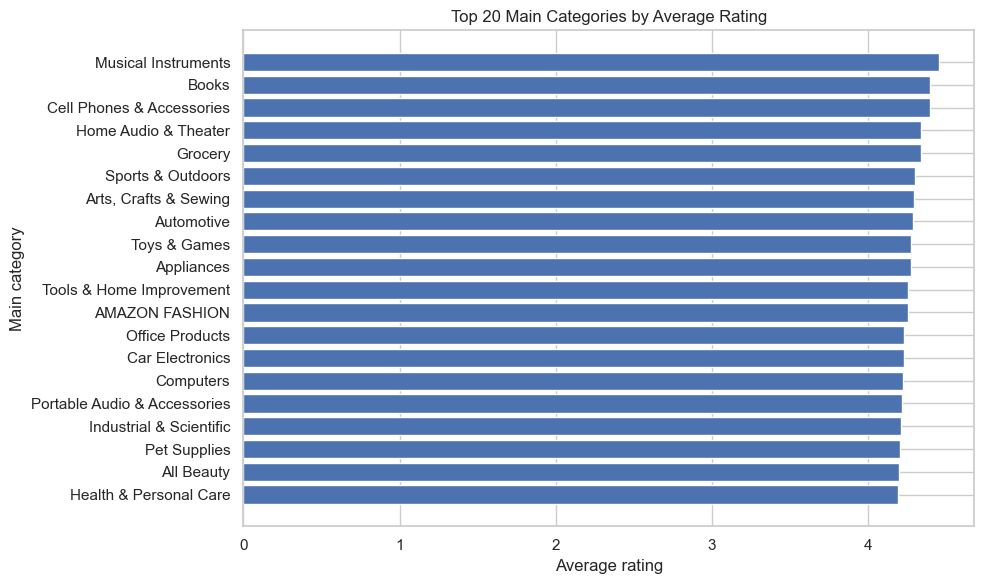

In [14]:
# Average rating by main category (if average_rating exists)
if 'main_category' in item_df.columns and 'average_rating' in item_df.columns:
    rating_by_cat = (
        item_df[['main_category', 'average_rating']]
        .copy()
    )
    rating_by_cat['average_rating'] = pd.to_numeric(rating_by_cat['average_rating'], errors='coerce')
    rating_by_cat = rating_by_cat.dropna(subset=['average_rating'])

    if len(rating_by_cat) > 0:
        # Use categories with at least 50 items for stability
        min_n = 50
        counts = rating_by_cat['main_category'].fillna('Unknown').value_counts()
        keep = counts[counts >= min_n].index
        rating_summary = (
            rating_by_cat[rating_by_cat['main_category'].fillna('Unknown').isin(keep)]
            .assign(main_category=lambda d: d['main_category'].fillna('Unknown'))
            .groupby('main_category')['average_rating']
            .mean()
            .sort_values(ascending=False)
            .head(20)
        )
        if len(rating_summary) > 0:
            plt.figure(figsize=(10, 6))
            plt.barh(rating_summary.index[::-1], rating_summary.values[::-1])
            plt.title('Top 20 Main Categories by Average Rating')
            plt.xlabel('Average rating')
            plt.ylabel('Main category')
            rating_by_cat_path = fig_dir / 'avg_rating_by_main_category.png'
            plt.tight_layout()
            plt.savefig(rating_by_cat_path, dpi=150)
            rating_by_cat_path
        else:
            'not enough categories with sufficient items for rating summary'
    else:
        'average_rating column exists but no numeric values'
else:
    'main_category or average_rating column not found'


该图用于比较不同主分类的平均评分水平，帮助判断哪些品类的用户口碑更好，从而支持品类优先级和选品策略制定。


该图用于识别商品数量最多的前20家店铺，帮助定位头部店铺与供给集中情况，便于后续对重点店铺进行分析。
